In [91]:
import sys
sys.path.append('..')

import pandas as pd
import networkx as nx
import numpy as np
import socnet as sn
import pylab as plt
import random

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1

In [58]:
file = pd.read_csv("data.csv")

In [59]:
file = file.fillna(-1)
file

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,-1.0,-1.0,-1.0,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
2,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
3,3,240,Hanover,245,Bavaria,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
4,3,240,Hanover,255,Germany,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
5,3,240,Hanover,255,Germany,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
6,3,240,Hanover,267,Baden,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
7,3,240,Hanover,267,Baden,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
8,3,240,Hanover,269,Saxony,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
9,3,240,Hanover,269,Saxony,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1


In [60]:
paises1 = file[['state_name1']]
paises2 = file[['state_name2']]

In [61]:
#nodes
_paises = paises1["state_name1"].tolist() + paises2["state_name2"].tolist()
paises_filtered = set(_paises)

In [62]:
p1 = file["state_name1"].tolist()
p2 = file["state_name2"].tolist()

In [63]:
year_rel = {}
counter = 0
year_dead = file["dyad_end_year"].tolist()
year_rel_end = []

for year in file["dyad_st_year"].tolist():
    if str(year) in year_rel:
        year_rel["{}".format(year)].append((p1[counter],p2[counter]))
        year_rel_end.append([p1[counter],p2[counter],str(int(year_dead[counter]))])
    else:
        year_rel["{}".format(year)] = [(p1[counter],p2[counter])]
        year_rel_end.append([p1[counter],p2[counter],str(int(year_dead[counter]))])
        
    counter+=1

In [74]:
x = (50,54)
for i in range(x[0],x[1]):
    print(i)

50
51
52
53


In [86]:
g=nx.Graph()
g.add_nodes_from(paises_filtered)

for n in g.nodes:

    g.nodes[n]['label'] = n
    g.nodes[n]['master'] = False

first = True

years = []

for year in sorted(year_rel):
    years.append(year)

#dicionário onde serão salvas as mudanças de taxonomia nas transições dos anos
changes = {}

"""    
formato:
    
    changes{'1816-1817':[...],'1817-1818:[...], ...}
    
    para cada par de anos teremos uma contador para cada tipo de transição
    no seguinte formato
    
       INDEX: 0 => 0-1
              1 => 0-2
              2 => 0-3
              3 => 1-0
              4 => 1-2
              5 => 1-3
              6 => 2-0
              7 => 2-1
              8 => 2-3
              9 => 3-0
             10 => 3-1
             11 => 3-2
"""

#dicionario onde serão salvas as porcentagens de taxonomia
percentage = {}

p_primeira_guerra = (50,54)
p_segunda_guerra = (62,76)
p_guerra_fria = (77,119)

primeira_guerra = []
segunda_guerra = []
guerra_fria = []

periodos = [p_primeira_guerra,p_segunda_guerra,p_guerra_fria]

for periodo in range(0,len(periodos)):
    for i in range(periodos[periodo][0],periodos[periodo][1]): 
        
        masters = {}

        if first:
            first = False
        else:
           # g.remove_edges_from(year_rel[_key])
           for end_year in year_rel_end:
                if end_year[2] == str(years[i]):
                    if g.has_edge(end_year[0],end_year[1]):
                        g.remove_edge(end_year[0],end_year[1])

        for n in g.nodes():
            g.nodes[n]['triades'] = dict()    


        if str(years[i]) in year_rel:
            g.add_edges_from(year_rel[str(years[i])])

        for e in g.edges:
            g.edges[e[0], e[1]]['color'] = (0,0,0)

        #frames.append(sn.generate_frame(g))
        #_key = key

         #formato -> ['Russia','Brasil','USA',1] - sendo 1 o numero de arestas
        triades = []

        triades_total = 0

        #contador de triades com respectivos tipos de arestas, relacionado ao index
        #index 0 -> 0 arestas
        #index 1 -> 1 aresta
        #index 2 -> 2 arestas
        #index 3-> 3 arestas
        edges_count = [0,0,0,0]

        for nm in g.nodes():
           # print(nm)
            for n1 in g.nodes():
                for n2 in g.nodes():
                    if nm != n1 and nm != n2 and n1 != n2:

                        check = True

                        if n1 in g.nodes[nm]['triades'].keys():
                            if n2 in g.nodes[nm]['triades'][n1]:
                                check = False
                        if n2 in g.nodes[nm]['triades'].keys():
                            if n1 in g.nodes[nm]['triades'][n2]:
                                check = False

                        if check:

                            #g.nodes[n1]['triades'].update({nm:n2})
                            #g.nodes[n1]['triades'].update({n2:nm})
                            #g.nodes[n2]['triades'].update({n1:nm})
                            #g.nodes[n2]['triades'].update({nm:n1})
                            if n1 in g.nodes[n2]['triades'].keys():
                                g.nodes[n2]['triades'][n1].append(nm)
                            else:
                                g.nodes[n2]['triades'][n1] = [nm]

                            if n2 in g.nodes[n1]['triades'].keys():
                                g.nodes[n1]['triades'][n2].append(nm)
                            else:
                                g.nodes[n1]['triades'][n2] = [nm]

                            if nm in g.nodes[n1]['triades'].keys():
                                g.nodes[n1]['triades'][nm].append(n2)
                            else:
                                g.nodes[n1]['triades'][nm] = [n2]
                                #print(g.nodes[n1]['triades'])
                            if nm in g.nodes[n2]['triades'].keys():
                                #print(n1,n2,nm)
                                g.nodes[n2]['triades'][nm].append(n1) 
                            else:
                                g.nodes[n2]['triades'][nm] = [n1]

                            triades_total += 1

                            nm_count = 0
                            n1_count = 0
                            n2_count = 0
                            edges = 0

                            if (nm,n1) in g.edges():
                                edges += 1
                                nm_count += 1
                                n1_count += 1
                            if (nm,n2) in g.edges():
                                edges += 1
                                nm_count += 1
                                n2_count += 1
                            if (n1,n2) in g.edges():
                                edges += 1
                                n2_count += 1
                                n1_count += 1

                            if  edges == 2:

                                if nm_count == 2:
                                    node = nm
                                elif n1_count == 2:
                                    node = n1
                                else:
                                    node = n2

                                g.nodes[node]['master'] = True
                                triades.append([g.nodes[nm]['label'],g.nodes[n1]['label'],g.nodes[n2]['label'],edges,node])

                            else:
                                triades.append([g.nodes[nm]['label'],g.nodes[n1]['label'],g.nodes[n2]['label'],edges])

                            edges_count[edges] += 1

            #print(g.nodes[nm]['triades'])

        #calculo da porcentagem
        for edges_type in range(0,len(edges_count)):
            edges_count[edges_type] = edges_count[edges_type]*100/triades_total
        #print(edges_count)
        print(i,years[i])
        percentage.update({years[i]:edges_count})

        if i > 50:

            counter = [0 for i in range(0,12)]

            for triade in range(0,len(triades)):
                if triades[triade][3] != triades_old[triade][3]:
                    #print(triades[triade],triades_old[triade])

                    if triades_old[triade][3] == 0:
                        if triades[triade][3] == 1:
                            index = 0
                        elif triades[triade][3] == 2:
                            index = 1
                        else:
                            index = 2
                    elif triades_old[triade][3] == 1:
                        if triades[triade][3] == 0:
                            index = 3
                        elif triades[triade][3] == 2:
                            index = 4
                        else:
                            index = 5
                    elif triades_old[triade][3] == 2:

                        if triades[triade][3] == 0:
                            index = 6
                        elif triades[triade][3] == 1:
                            index = 7
                        #elif triades[triade][3] == 2:
                         #   print(g.nodes[triades_old[triade][4]]['label'],"2-2")
                          #  if g.nodes[triades_old[triade][4]]['label'] in masters.keys():
                           #     masters[g.nodes[triades_old[triade][4]]['label']].append(False)
                            #else:
                             #   masters[g.nodes[triades_old[triade][4]]['label']] = [False]
                        else:
                            #print(g.nodes[triades_old[triade][4]]['label'],"2-3")
                            #transição de 2-3
                            
                            if g.nodes[triades_old[triade][4]]['label'] in masters.keys():
                                masters[g.nodes[triades_old[triade][4]]['label']].append(True)
                            else:
                                masters[g.nodes[triades_old[triade][4]]['label']] = [True]

                            index = 8

                    else:
                        if triades[triade][3] == 0:
                            index = 9
                        elif triades[triade][3] == 1:
                            index = 10
                        else:
                            index = 11

                    counter[index] += 1

            key = str(years[i-1])+"-"+str(years[i])
            changes.update({key: counter})

        for pais in masters.keys():
            count = 0
            for i in masters[pais]:
                if i:
                    count += 1
            
            if periodo == 0:
                primeira_guerra.append((g.degree(pais),count))
            elif periodo == 1:
                segunda_guerra.append((g.degree(pais),count))
            else:
                guerra_fria.append((g.degree(pais),count))
        
        triades_old = triades

    print("primeira guerra:\n")
    print(primeira_guerra)
    print("segunda guerra:\n")
    print(segunda_guerra)
    print("guerra fria:\n")
    print(guerra_fria)
        
print(changes)
print(percentage)

50 1914
51 1915
52 1916
53 1920
primeira guerra:

[(3, 2), (5, 6)]
segunda guerra:

[]
guerra fria:

[]
62 1930
63 1932
64 1933
65 1934
66 1935
67 1936
68 1937
69 1938
70 1939
71 1940
72 1941
73 1942
74 1944
75 1945
primeira guerra:

[(3, 2), (5, 6)]
segunda guerra:

[(6, 2), (6, 6), (9, 2), (12, 12), (2, 2), (8, 2), (8, 18), (17, 4), (10, 2), (12, 2), (4, 2), (5, 2), (4, 2), (6, 4), (5, 4), (5, 4), (5, 2), (6, 2), (5, 2)]
guerra fria:

[]
77 1947
78 1948
79 1949
80 1950
81 1951
82 1952
83 1953
84 1954
85 1955
86 1956
87 1957
88 1958
89 1959
90 1960
91 1961
92 1962
93 1963
94 1964
95 1966
96 1967
97 1968
98 1969
99 1970
100 1971
101 1972
102 1973
103 1974
104 1975
105 1976
106 1977
107 1978
108 1979
109 1980
110 1981
111 1982
112 1983
113 1984
114 1986
115 1988
116 1989
117 1990
118 1991
primeira guerra:

[(3, 2), (5, 6)]
segunda guerra:

[(6, 2), (6, 6), (9, 2), (12, 12), (2, 2), (8, 2), (8, 18), (17, 4), (10, 2), (12, 2), (4, 2), (5, 2), (4, 2), (6, 4), (5, 4), (5, 4), (5, 2), (6, 2)

In [88]:
df1 = pd.DataFrame({
'degree': [i[0] for i in primeira_guerra],
'count': [i[1] for i in primeira_guerra]
})

df2 = pd.DataFrame({
'degree': [i[0] for i in segunda_guerra],
'count': [i[1] for i in segunda_guerra]
})

df3 = pd.DataFrame({
'degree': [i[0] for i in guerra_fria],
'count': [i[1] for i in guerra_fria]
})

In [89]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.2f}".format(r), #unicode code for lowercase rho (ρ)
                xy=(.1, .9), xycoords=ax.transAxes)

### Primeira Guerra

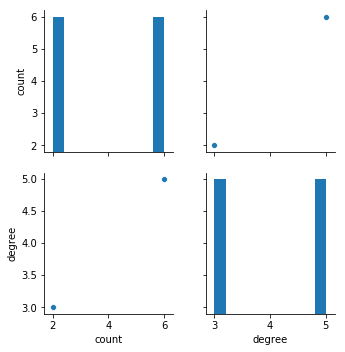

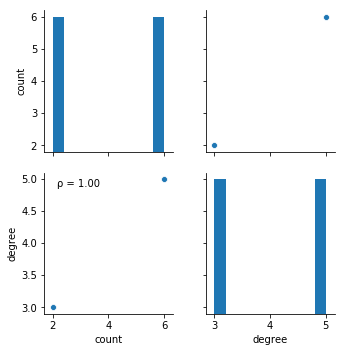

In [92]:
g = sns.pairplot(df1)
g.map_lower(corrfunc)

plt.show()

/home/toyama/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



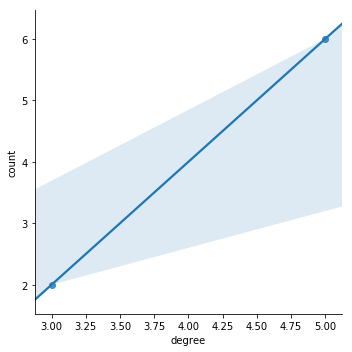

In [93]:
g = sns.lmplot(x="degree",y="count",data=df1)
plt.show()

### Segunda Guerra

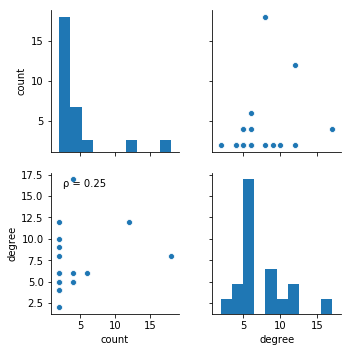

In [94]:
g = sns.pairplot(df2)
g.map_lower(corrfunc)

plt.show()

/home/toyama/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



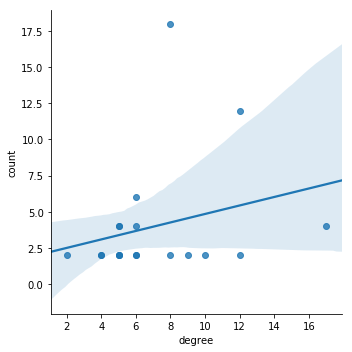

In [95]:
g = sns.lmplot(x="degree",y="count",data=df2)
plt.show()

### Guerra Fria

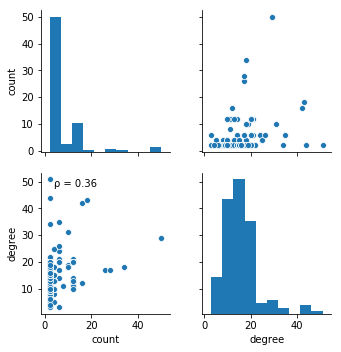

In [96]:
g = sns.pairplot(df3)
g.map_lower(corrfunc)

plt.show()

/home/toyama/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



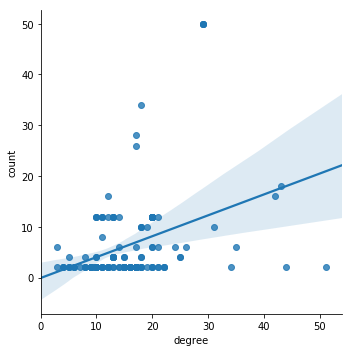

In [97]:
g = sns.lmplot(x="degree",y="count",data=df3)
plt.show()